In [92]:
import MLP
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 所有数据的第0号作为训练数据，其余作为测试数据

In [93]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
TrainData,TestData={},{}
for k in data.keys():
    if '.csv0' in k:
        TrainData[k]=data[k]
    else:
        TestData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
xtem,ytem=[],[]
for k in TrainData.keys():
    xtem.append(TrainData[k][:,1:TrainData[k].shape[1]-4])
    ytem.append(TrainData[k][:,[-4,-3,-2,-1]])
x = Variable(torch.FloatTensor(np.concatenate(xtem, axis=0).tolist()))
y = Variable(torch.FloatTensor(np.concatenate(ytem, axis=0).tolist()))

# MLP

## 训练

MLP(
  (model): Sequential(
    (input): Linear(in_features=12, out_features=10, bias=True)
    (h1): Linear(in_features=10, out_features=10, bias=True)
    (h2): Linear(in_features=10, out_features=10, bias=True)
    (h3): Linear(in_features=10, out_features=10, bias=True)
    (h4): Linear(in_features=10, out_features=10, bias=True)
    (h5): Linear(in_features=10, out_features=10, bias=True)
    (h6): Linear(in_features=10, out_features=10, bias=True)
    (h7): Linear(in_features=10, out_features=10, bias=True)
    (h8): Linear(in_features=10, out_features=10, bias=True)
    (h9): Linear(in_features=10, out_features=10, bias=True)
    (h10): Linear(in_features=10, out_features=10, bias=True)
    (h11): Linear(in_features=10, out_features=10, bias=True)
    (h12): Linear(in_features=10, out_features=10, bias=True)
    (h13): Linear(in_features=10, out_features=10, bias=True)
    (h14): Linear(in_features=10, out_features=10, bias=True)
    (h15): Linear(in_features=10, out_features=10

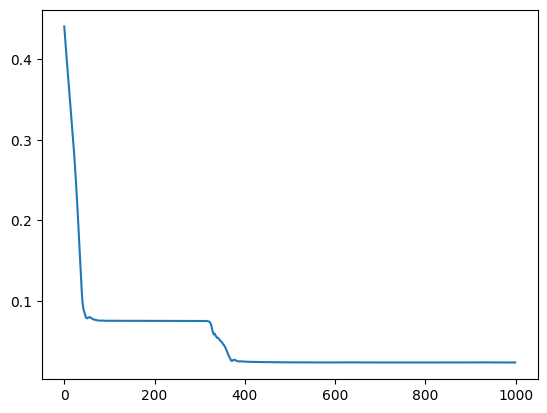

In [94]:
param={
    'inputsize':x.shape[1],
    'outputsize':y.shape[1],
    'layers':[10 for _ in range(30)],
    'act':['relu' for _ in range(30)]+['tanh'],
    'learning_rate':0.001,
    'opt':'Adam',
}
train=True
initial_train=True
net = MLP.MLP(param)
print(net)

if train:
    if not initial_train:
        net=torch.load('./model/MLP')
    optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse=[]
    for t in range(1000):
        prediction = net(x)
        loss = loss_func(prediction,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.detach().numpy())
        if t%1000 ==0:
            print(loss)
    plt.plot(mse)
    torch.save(net.model,'./model/MLP')
else:
    net=torch.load('./model/MLP')

# 训练并保存训练过程图

In [95]:
train=True
initial_train=True
net_tem = MLP.MLP(param)
print(net)

if train:
    if not initial_train:
        net_tem=torch.load('./model/MLP')
    optimizer = torch.optim.Adam(net_tem.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse,vmse=[],[]
    indt, indv = [i for i in range(int(x.shape[0]*0.7))], [i for i in range(int(x.shape[0]*0.7),int(x.shape[0]))]#[np.abs(int(i)) for i in (np.random.randn(int(x.shape[0]*0.7))*x.shape[0])]
    xt, yt = x[indt], y[indt]
    xv, yv = x[indv], y[indv]
    for t in range(1000):
        prediction = net_tem(xt)
        loss = loss_func(prediction,yt)
        
        vp = net_tem(xv)
        lossv = loss_func(vp,yv)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.detach().numpy())
        vmse.append(lossv.detach().numpy())
        if t%1000 ==0:
            print(loss)
    
    #torch.save(net.model,'./model/MLP')
else:
    net=torch.load('./model/MLP')

MLP(
  (model): Sequential(
    (input): Linear(in_features=12, out_features=10, bias=True)
    (h1): Linear(in_features=10, out_features=10, bias=True)
    (h2): Linear(in_features=10, out_features=10, bias=True)
    (h3): Linear(in_features=10, out_features=10, bias=True)
    (h4): Linear(in_features=10, out_features=10, bias=True)
    (h5): Linear(in_features=10, out_features=10, bias=True)
    (h6): Linear(in_features=10, out_features=10, bias=True)
    (h7): Linear(in_features=10, out_features=10, bias=True)
    (h8): Linear(in_features=10, out_features=10, bias=True)
    (h9): Linear(in_features=10, out_features=10, bias=True)
    (h10): Linear(in_features=10, out_features=10, bias=True)
    (h11): Linear(in_features=10, out_features=10, bias=True)
    (h12): Linear(in_features=10, out_features=10, bias=True)
    (h13): Linear(in_features=10, out_features=10, bias=True)
    (h14): Linear(in_features=10, out_features=10, bias=True)
    (h15): Linear(in_features=10, out_features=10

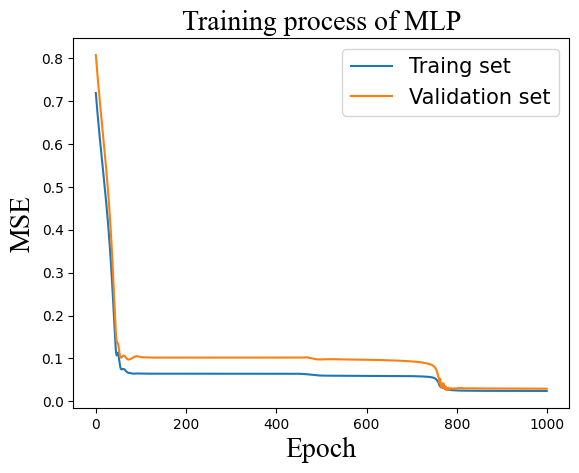

In [96]:
font1={'family':'Times New Roman','weight':'normal','size':20}
font2={'family':'Times New Roman','weight':'normal','size':10}

plt.plot(mse,label='Traing set')
plt.plot(vmse,label='Validation set')
plt.title('Training process of MLP',font=font1)
plt.xlabel('Epoch',font=font1)
plt.ylabel('MSE',font=font1)
plt.legend(prop = {'size':15})
plt.savefig('./fig7-a.tif',bbox_inches = 'tight',dpi=200)

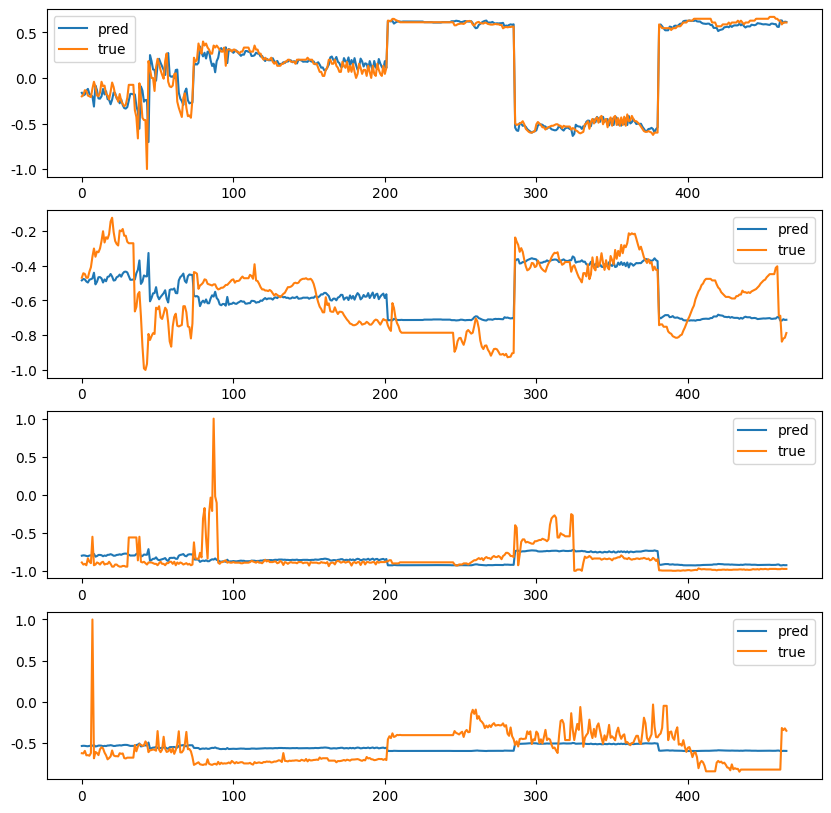

In [97]:
yp = net(x)
fig,ax=plt.subplots(4,1,figsize=(10,10))
for i in range(4):
    ax[i].plot(yp.detach().numpy()[:,i],label='pred')
    ax[i].plot(y.detach().numpy()[:,i],label='true')
    ax[i].legend()

## 测试

In [98]:
for f in TestData.keys():
    y1 = Variable(torch.FloatTensor(TestData[f][:,[-4,-3,-2,-1]].tolist()))
    x1 = Variable(torch.FloatTensor(TestData[f][:,1:TestData[f].shape[1]-4].tolist()))
    print(x1.shape)
    yp = net(x1)
    #mse = np.sqrt(np.mean(np.square(y1.detach().numpy()-yp.detach().numpy())))
    pd.DataFrame(yp.detach().numpy()).to_csv('./results/MLP/results_'+f)
    os.chdir(os.path.pardir)
    print(os.getcwd())
    pd.DataFrame(yp.detach().numpy()).to_csv('./Step4_Compare/results_p/MLP/results_'+f)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step3_DNN')


torch.Size([113, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([446, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([435, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([32, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([669, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([230, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([371, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([548, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([63, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([805, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([209, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([307, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([230, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([379, 12])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([200, 12])
/Users/tianwenchong/Desktop/